In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline


In [147]:
def get_data(filename):
    data=pd.read_csv('housing.csv')
    data=(data-data.mean())/data.std()
    return data
tt = get_data("housing.csv")

In [148]:
def get_X_Y(data):
    m=len(data)
    X0=np.ones(m)
    X1=data['sqft'].astype(float)
    X2=data['floors'].astype(float)
    X3=data['bedrooms'].astype(float)
    X4=data['bathrooms'].astype(float)
    Y=np.array(data['price'].astype(float))
    X=np.array([X0,X1,X2,X3,X4]).T
    return X,Y
    

In [149]:
def cost_function(X, Y, Theta):
    m = len(X)
    J = np.sum((X.dot(Theta) - Y) ** 2)/(2 * m)
    return J
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse
def get_rmse(Theta):
    X,Y=get_X_Y(test_data)
    Y_Pred=X.dot(Theta)
    return rmse(Y,Y_Pred)


In [150]:
def plot_cost(iter_list,cost_list):
    plt.plot(iter_list,cost_list,'r.')
    plt.xlabel('Iterations ->')
    plt.ylabel('Cost')
    plt.show()

In [151]:
def gradientDescent(X, Y, Theta, alpha, m, numIterations,lamda=0):
    m = len(Y)
    cost_list=list()
    iter_list=list()
    tolerance = 1e-5
    theta_old=Theta
    for iteration in range(numIterations):
        # Hypothesis Values
        h = X.dot(Theta)
        loss = h - Y
        gradient = (X.T.dot(loss))/ m
        Theta = (1-(alpha/m)*lamda)*Theta - alpha * gradient
        if np.sum(abs(Theta - theta_old)) < tolerance:
            #print("CONVERGED after "+str(iteration)+" iterations")
            break
        cost = cost_function(X, Y, Theta)
        cost_list.append(cost)
        iter_list.append(iteration)
        theta_old=Theta
        
    return Theta,cost_list,iter_list

In [152]:
data=get_data('housing.csv')
train_length=(int)(0.8*len(data))
train_data=data[0:train_length+1]
test_data=data[train_length+1:]

In [158]:
X,Y=get_X_Y(train_data)
rmse_list=list()
lambda_list=list()
lamda=0
#for lamda in np.arange(0.0,2.0,0.009):
for lamda in 10**np.linspace(-5.0,1.0,60):
    t = int( time.time() * 1000.0 )
    np.random.seed( ((t & 0xff000000) >> 24)+((t & 0x00ff0000)>>8) +((t & 0x0000ff00)<<8)+((t & 0x000000ff)<<24))
    Theta=np.random.rand(5)
    Theta,cost_list,iter_list=gradientDescent(X,Y,Theta,0.05,len(train_data), 10000,lamda)
    rmse_list.append(get_rmse(Theta))
    lambda_list.append(lamda)



In [141]:
for lamda in np.linspace(1.1,5.0,100):
    t = int( time.time() * 1000.0 )
    np.random.seed( ((t & 0xff000000) >> 24)+((t & 0x00ff0000)>>8) +((t & 0x0000ff00)<<8)+((t & 0x000000ff)<<24))
    Theta=np.random.rand(5)
    Theta,cost_list,iter_list=gradientDescent(X,Y,Theta,0.05,len(train_data), 10000,lamda)
    rmse_list.append(get_rmse(Theta))
    lambda_list.append(lamda)

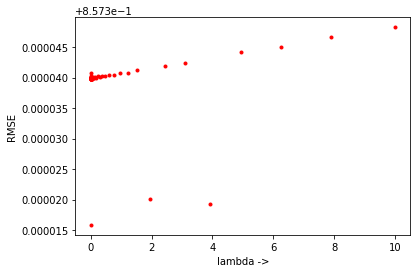

In [159]:
lambda_list=lambda_list
rmse_list=rmse_list
plt.plot(lambda_list,rmse_list,'r.')
plt.xlabel('lambda ->')
plt.ylabel('RMSE')
plt.show()

In [155]:
10**np.linspace(-5.0,5.0,30)

array([  1.00000000e-05,   2.21221629e-05,   4.89390092e-05,
         1.08263673e-04,   2.39502662e-04,   5.29831691e-04,
         1.17210230e-03,   2.59294380e-03,   5.73615251e-03,
         1.26896100e-02,   2.80721620e-02,   6.21016942e-02,
         1.37382380e-01,   3.03919538e-01,   6.72335754e-01,
         1.48735211e+00,   3.29034456e+00,   7.27895384e+00,
         1.61026203e+01,   3.56224789e+01,   7.88046282e+01,
         1.74332882e+02,   3.85662042e+02,   8.53167852e+02,
         1.88739182e+03,   4.17531894e+03,   9.23670857e+03,
         2.04335972e+04,   4.52035366e+04,   1.00000000e+05])